# Tabla de contenido <a id='back'></a>

* [Introducción](#intro)
* [1. Importación de datos](#data_import)
* [2. Preparación de datos](#data_preprocessing)
* [3. Análisis de datos](#data_analytic)
* [4. Creación de perfiles de usuario por región](#profiles)
* [5. Test de hipótesis](#hypothesis_test)
    * [5.1 Primer test](#first_hypothesis)
    * [5.2 Segundo test](#second_hypothesis)
* [Conclusiones](#end)

# Introducción <a id='intro'></a>

La tienda online Ice vende videojuegos, y esta entregó una base de datos hasta el 2016 con el objetivo de estudiarlos para realizar una buena campaña para el 2017. 

Esta base de datos se preparará y se analizará para comprobar las siguientes hipótesis:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# 1. Importación de datos <a id='data_import'></a>

In [74]:
#cargando librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats as st
from scipy.stats import t
from typing import List
from scipy.stats import ttest_ind

In [75]:
#cargando el archivo de datos a un DataFrame
try:
    df = pd.read_csv("/datasets/games.csv")
except:
    df = pd.read_csv("games.csv")

# 2.Preparación de datos <a id='data_preprocessing'></a>

In [76]:
#mostrando el df
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [77]:
#pasando los nombres de las columnas a minúsculas
columns = list(df.columns)
df.columns = [x.lower() for x in columns]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [78]:
#mostrando tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


En algún caso cambiaríamos "year_of_release" por date, pero como solo tenemos el año, se puede trabajar como float.
Además, user_score se cambiará a float más adelante, ya que existen strings entre sus datos.

In [79]:
#observando si hay datos duplicados
df[df.duplicated()].value_counts()

Series([], dtype: int64)

No hay filas duplicadas.

Ahora se verificarán los valores ausentes para trabajarlos

In [80]:
#calculando los valores ausentes para cada columna (Los valores True son los ausentes)
for col in df:
    print(df[col].isna().value_counts())

False    16713
True         2
Name: name, dtype: int64
False    16715
Name: platform, dtype: int64
False    16446
True       269
Name: year_of_release, dtype: int64
False    16713
True         2
Name: genre, dtype: int64
False    16715
Name: na_sales, dtype: int64
False    16715
Name: eu_sales, dtype: int64
False    16715
Name: jp_sales, dtype: int64
False    16715
Name: other_sales, dtype: int64
True     8578
False    8137
Name: critic_score, dtype: int64
False    10014
True      6701
Name: user_score, dtype: int64
False    9949
True     6766
Name: rating, dtype: int64


**name**

In [81]:
df_name = df[df["name"].isna()]
df_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Se tiene solo la información de las ventas de estas dos filas, no se conoce el nombre del juego, ni la evaluación que tiene, por lo que la información que entrega no es importante para el análisis, por lo que se procederá a eliminar estas dos filas.

In [82]:
df = df.dropna(subset = ["name"])

In [83]:
df_name = df[df["name"].isna()]
df_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**year_of_release**

In [85]:
df_year = df[df["year_of_release"].isna()]
df_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [86]:
df[df["name"] == "Madden NFL 2004"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Algunos años están ausentes, pero si tenemos el año del mismo juego en otra consola, podemos obtener el año de lanzamiento del juego.

In [87]:
#creando un df sin valores ausentes para "year_of_release"
df_filtered_year = df.dropna(subset = ["year_of_release"]).reset_index(drop = True)

In [88]:
#creando función para rellenar años ausentes
def filling_years(row):
    name = row["name"]
    year = row["year_of_release"]
    if pd.isna(year):
        value = df_filtered_year.loc[df_filtered_year.loc[:, 'name'] == name]["year_of_release"].median()
        if pd.isna(value):
            return value
        return int(value)
    return year

In [89]:
#comprobando la función, debe dar 2003
filling_years(df.iloc[183])

2003

In [90]:
#comprobando la función, debe dar 1985
filling_years(df.iloc[1])

1985.0

In [91]:
#aplicando la función a la columna "year_of_release"
df["year_of_release"] = df.apply(filling_years, axis=1) 

In [92]:
#imprimiento la columna de años vacíos para ver si disminuyeron o desaparecieron
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Se rellenaron 123 datos ausentes de la columna "year_of_release". Los años que no se rellenaron es porque no tienen ninguna referencia de año del mismo juego en otra consola. Tampoco se puede rellenar con alguna medida aritmética porque no tendría sentido. Simplemente se dejarán así.

**critic_score**

Ahora se observará como funciona "critic_score" según el nombre del juego.

In [93]:
df["name"].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [94]:
df[df["name"] == "Need for Speed: Most Wanted"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Como se puede observar en la tabla anterior, el critic_score depende del juego en sí y de la consola en la que se esté jugando, para un mismo juego el critic_score puede variar según la consola, por lo que si rellenamos los valores ausentes con la información que tenemos, podemos rellenar con datos alejados a la realidad. Debido a esto se toma la decisión de no rellenarlos.

**user_score**

Hay algunos datos definidos como TBD (to be determined). Como aún no se tienen estos datos se procederá a dejarlos como valores ausentes, ya que no nos sirve para el estudio, y así podemos cambiar el tipo de datos a float.

In [95]:
#eliminando los valores "tbd"
df["user_score"] = df["user_score"].replace("tbd", None)

In [96]:
#convirtiendo los datos de user_score a float
df["user_score"] = df["user_score"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


En este caso, ocurre lo mismo que en critic_score. La evaluación depende del juego y de la consola, por lo que si no se tiene esta información, no se puede rellenar con otras estimaciones.

Para calcular las ventas totales para cada juego, primero se observa en la tabla anterior, con la información del dataframe, que las columnas que sirven para el cálculo están completas, luego se procede a hacer la suma.

In [97]:
#calculando las ventas totales para cada juego
df["total_sales"] = sum([df["na_sales"], df["eu_sales"], df["jp_sales"], df["other_sales"]])
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Análisis de datos <a id='data_analytic'></a>

<AxesSubplot:xlabel='year_of_release'>

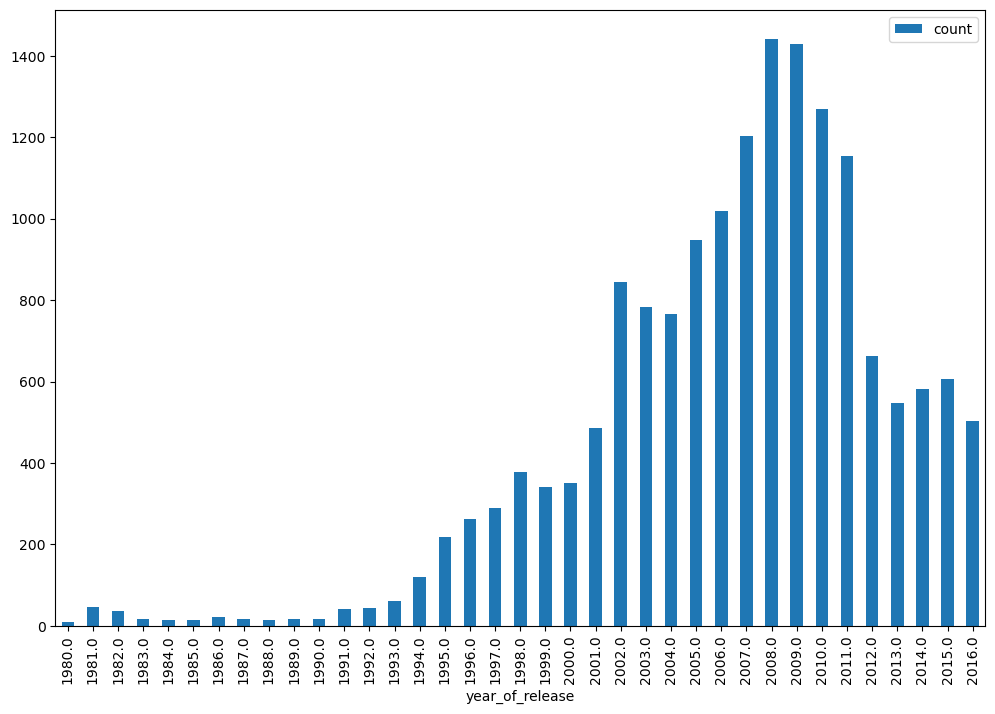

In [98]:
#contando los juegos lanzados por año
years = df["year_of_release"].value_counts().reset_index()
years.columns = ["year_of_release", "count"]
years.sort_values(by="year_of_release").plot(kind="bar", x="year_of_release",y="count", figsize = (12,8))

Se puede observar que desde 1994-1995 comenzó a aumentar de forma significativa el lanzamiento de juegos.
El año 2008 la venta de juegos llegó a su peak y luego comenzó a disminuir.

In [99]:
#Buscando las plataformas con más ventas
sales_per_platform = df.pivot_table(index="platform", values="total_sales", aggfunc = "sum").sort_values(by="total_sales", ascending=False)
sales_per_platform

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Las 6 plataformas que tienen mayores ventas son PS2, X360, PS3, Wii, DS y PS.

In [100]:
#creando un dataframe solo con las plataformas con mayores ventas
top_platform = list(sales_per_platform.head().reset_index()["platform"])
top_df = (df
          .query('platform in @top_platform')
          .pivot_table(index=["platform","year_of_release"], values="total_sales", aggfunc="sum")
          .reset_index()
         )
top_df.head()

,platform,year_of_release,total_sales
0,DS,1985.0,0.02
1,DS,2004.0,17.27
2,DS,2005.0,130.14
3,DS,2006.0,119.81
4,DS,2007.0,147.23


<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

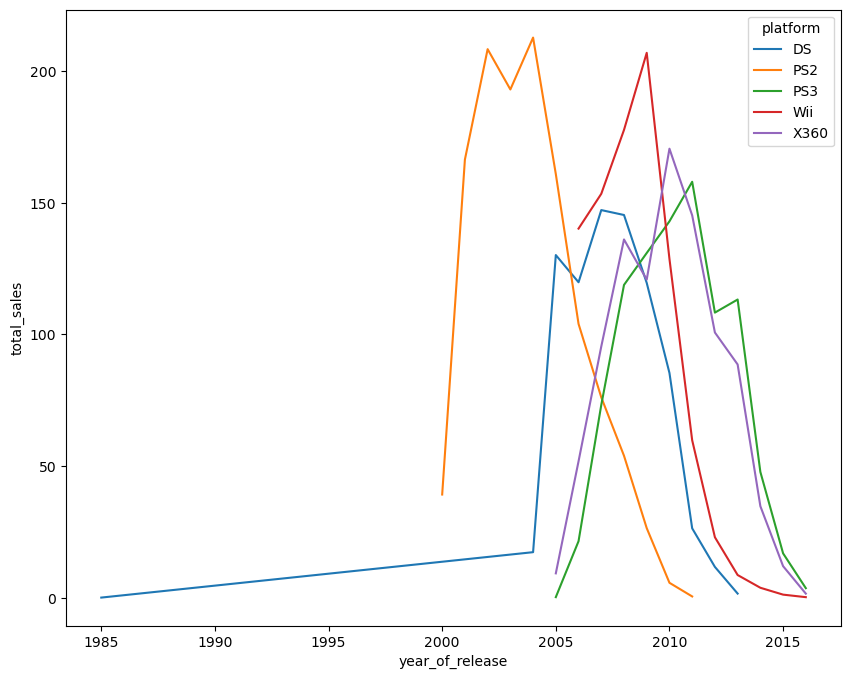

In [101]:
#graficando las distintas plataformas
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(x="year_of_release", y="total_sales",
             hue="platform", data=top_df
            )

Del gráfico anterior se puede observar que la plataforma "PS" era bastante popular hasta antes del 2000 y después dejó de vender.

Por otro lado, "PS3", "X360" y "Wii" aparecieron el 2005 y son las que siguen teniendo ventas.

En general, se observa que las consolas tienen una duración de 10 años antes de desaparecer. 

Por último, la consola DS tiene un dato atípico en el año 1985.

Para crear un modelo para el 2017 se tomarán en cuenta los datos de todas las consolas desde el 2014.

In [102]:
platform_df = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["platform","year_of_release"], values="total_sales", aggfunc="sum")
          .reset_index()
         )

In [103]:
platform_df.head()

,platform,year_of_release,total_sales
0,3DS,2015.0,27.78
1,3DS,2016.0,15.14
2,PC,2015.0,8.52
3,PC,2016.0,5.25
4,PS3,2015.0,16.82


<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

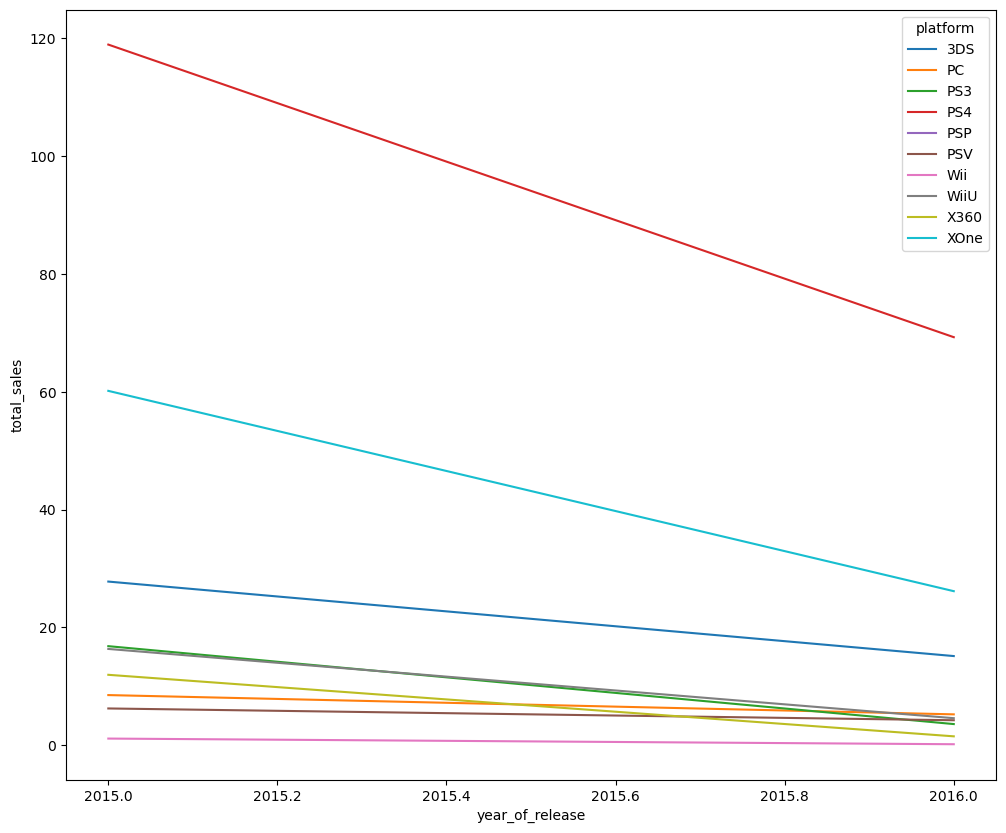

In [104]:
#graficando las distintas plataformas
fig, ax = plt.subplots(figsize = (12,10))
sns.lineplot(x="year_of_release", y="total_sales",
             hue="platform", data=platform_df
            )

En el gráfico anterior se pueden observar las consolas que siguen vendiendo desde el 2014 hasta hoy, con excepción de la PSP que dejó de vender en 2015.

Se confirma que las más populares son PS4, XOne, 3DS, PS3, WiiU y X360, las primeras dos con mucha ventaja.

(0.0, 11.0)

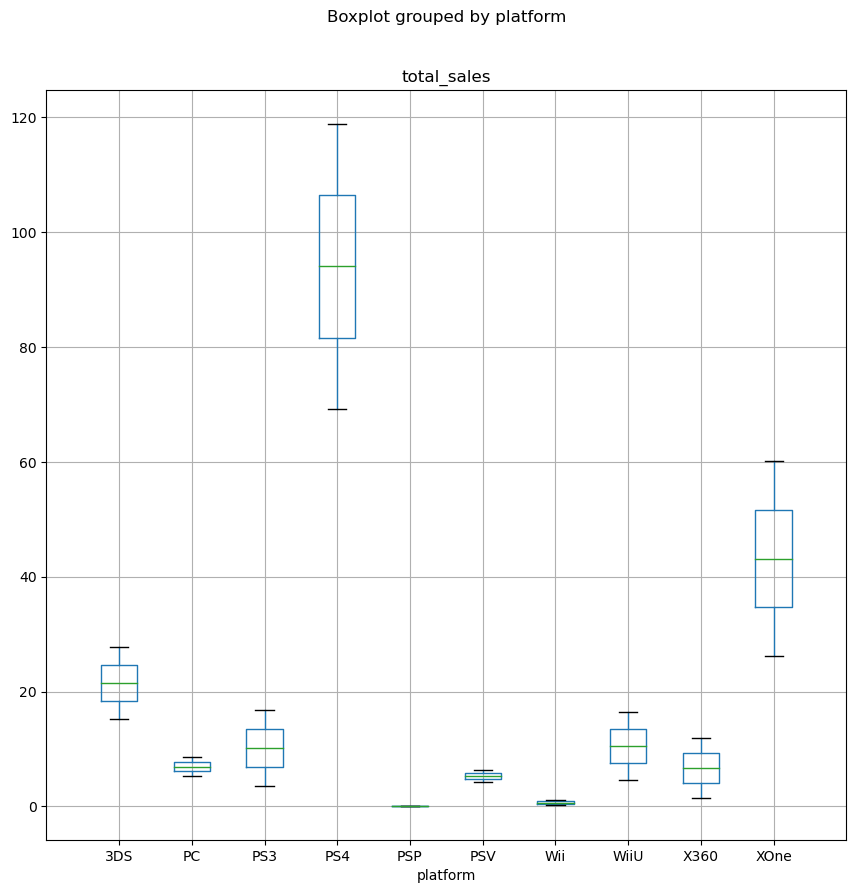

In [105]:
#diagrama de caja para las plataformas
platform_df.boxplot(column="total_sales", by="platform", figsize=(10,10))
plt.xlim(0,11)

Las mejores ventas las tiene la PS4 seguida de la XOne.

In [106]:
#filtrando para tener solo los datos de X360
df_PS4 = df.query('platform == "PS4"')
df_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

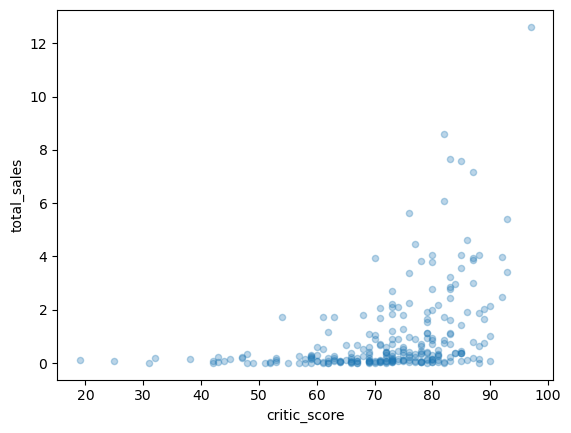

In [107]:
#grafico de dispersión entre critic score y total sales
df_PS4.plot(x="critic_score", y="total_sales", kind="scatter", alpha=0.3)

<div class="alert alert-block alert-info">
<b>Esto ya lo corregi, puesto que las más populares al corregir el período son PS4 y XOne </b> <a class="tocSkip"></a>
</div>

In [108]:
#calculando la correlacion
df_PS4["critic_score"].corr(df_PS4["total_sales"])

0.40656790206178123

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

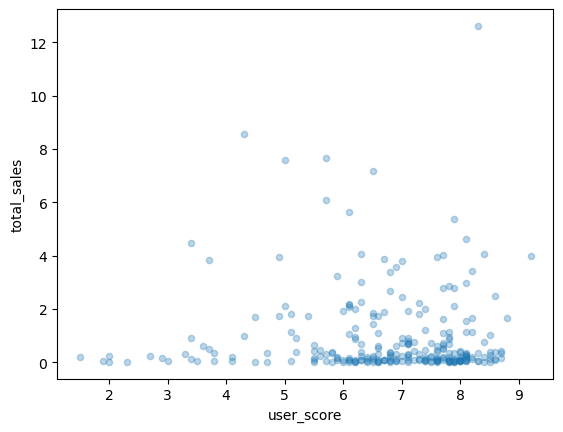

In [109]:
#grafico de dispersión entre user score y total sales
df_PS4.plot(x="user_score", y="total_sales", kind="scatter", alpha=0.3)

In [110]:
#calculando la correlacion
df_PS4["user_score"].corr(df_PS4["total_sales"])

-0.03195711020455644

La correlación para critic score es positiva y la de user_score es negativa, ambas son bajas, sobretodo user_score. Se puede concluir que la crítica no influye mucho en las ventas. "critic_score" influye más en "total_sales" que "user_score".

In [111]:
games_PS4 = df_PS4["name"].unique()
games_PS4

array(['Call of Duty: Black Ops 3', 'Grand Theft Auto V', 'FIFA 16',
       'Star Wars Battlefront (2015)', 'Call of Duty: Advanced Warfare',
       'FIFA 17', 'Fallout 4', 'FIFA 15', 'Destiny',
       "Uncharted 4: A Thief's End", 'The Last of Us',
       'Uncharted: The Nathan Drake Collection',
       'Call of Duty: Infinite Warfare', 'Minecraft', 'Battlefield 1',
       'Watch Dogs', 'Far Cry 4', 'The Witcher 3: Wild Hunt',
       "Assassin's Creed: Unity", 'Batman: Arkham Knight', 'NBA 2K16',
       'Call of Duty: Ghosts', "Tom Clancy's The Division",
       'Battlefield 4', 'Metal Gear Solid V: The Phantom Pain',
       "Assassin's Creed Syndicate", 'Madden NFL 16', 'FIFA 14',
       'Middle-Earth: Shadow of Mordor',
       "Assassin's Creed IV: Black Flag", 'inFAMOUS: Second Son',
       'Mortal Kombat X', 'Killzone: Shadow Fall', 'Bloodborne',
       'NBA 2K15', 'Need for Speed (2015)', 'Far Cry: Primal',
       "Tom Clancy's Rainbow Six: Siege", 'Madden NFL 15', 'Overwatch',
 

In [112]:
#filtrando para tener solo datos de PS3
df_XOne = df.query('platform == "XOne"')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

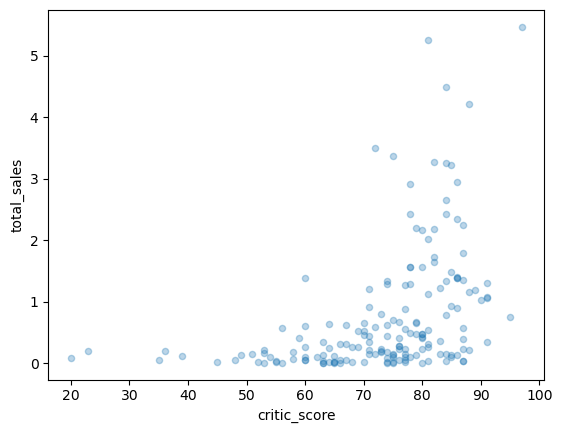

In [113]:
#grafico de dispersión entre critic score y total sales
df_XOne.plot(x="critic_score", y="total_sales", kind="scatter", alpha=0.3)

In [114]:
#calculando la correlacion
df_XOne["critic_score"].corr(df_XOne["total_sales"])

0.41699832800840153

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

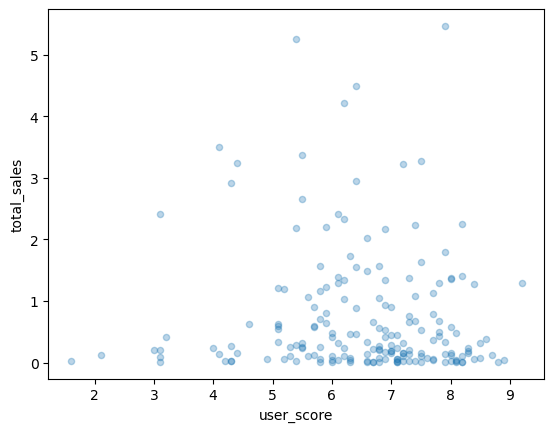

In [115]:
#grafico de dispersión entre user score y total sales
df_XOne.plot(x="user_score", y="total_sales", kind="scatter", alpha=0.3)

In [116]:
#calculando la correlacion
df_XOne["user_score"].corr(df_XOne["total_sales"])

-0.06892505328279418

La correlación para critic score es positiva y la de user_score es negativa, ambas son bajas, sobretodo user_score. Se puede concluir que la crítica no influye mucho en las ventas. "critic_score" influye más en "total_sales" que "user_score".

In [117]:
genre_df = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["genre","year_of_release"], values="total_sales", aggfunc="sum")
          .reset_index()
         )

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

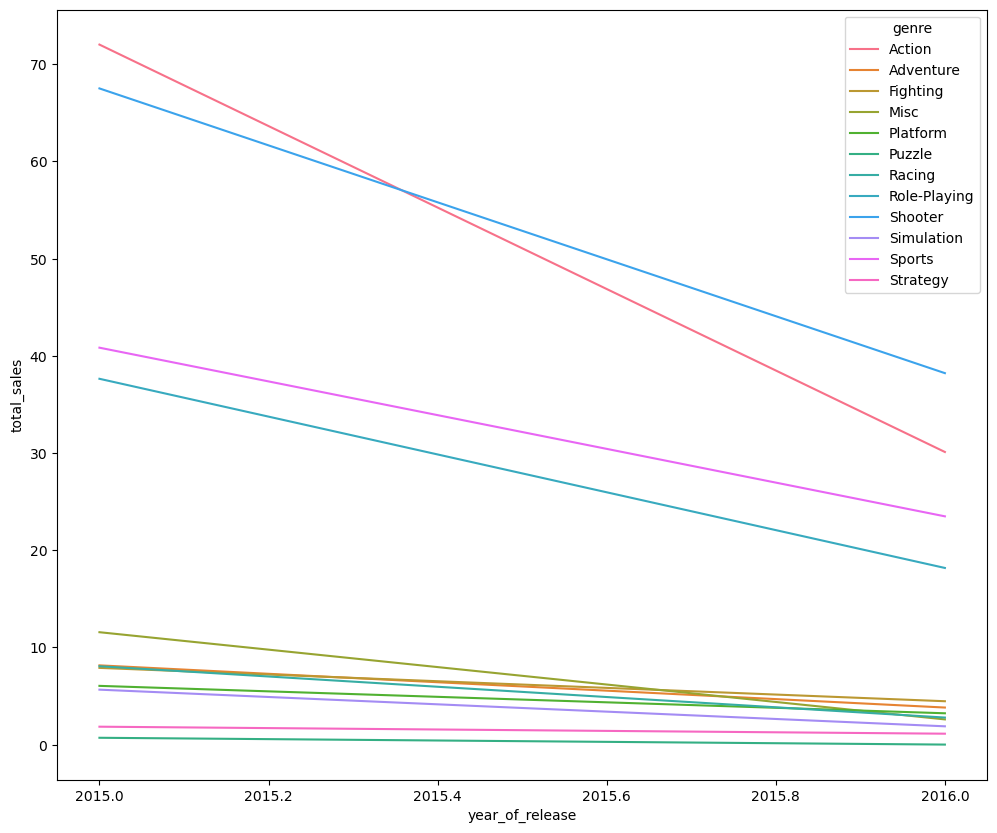

In [118]:
#graficando los distintos géneros por año
fig, ax = plt.subplots(figsize = (12,10))
sns.lineplot(x="year_of_release", y="total_sales",
             hue="genre", data=genre_df
            )

In [119]:
genre_df1 = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index="genre", values="total_sales", aggfunc="sum")
          .reset_index()
         )

<AxesSubplot:xlabel='genre'>

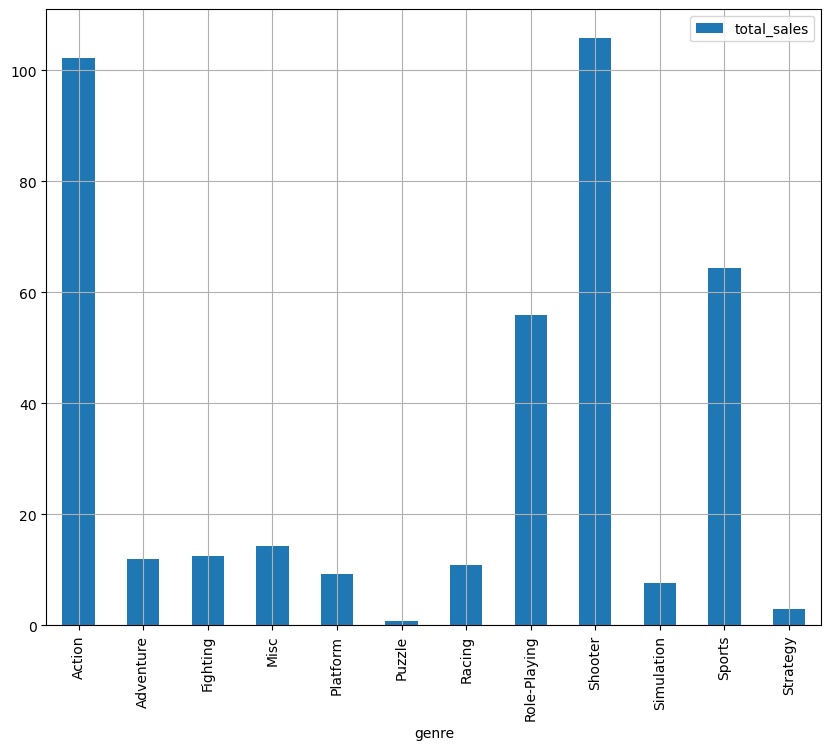

In [120]:
#graficando las ventas de los distintos géneros
genre_df1.plot(x="genre", y="total_sales", grid=True, figsize=(10,8), kind="bar")

Se puede observar en la gráfica que los géneros de juegos más rentables son los shooter y action. También están por sobre el promedio los de sport y Role-Playing. 

# Perfil de usuario <a id='profiles'></a>

**NA**

In [121]:
#imprimiento las plataformas con más ventas desde el 2015
platform_na = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["platform"], values="na_sales", aggfunc="sum")
          .reset_index()
         )
platform_na.sort_values(by="na_sales", ascending=False).head()

,platform,na_sales
3,PS4,63.86
9,XOne,50.30
0,3DS,10.31
7,WiiU,8.86
8,X360,8.05


<AxesSubplot:xlabel='platform'>

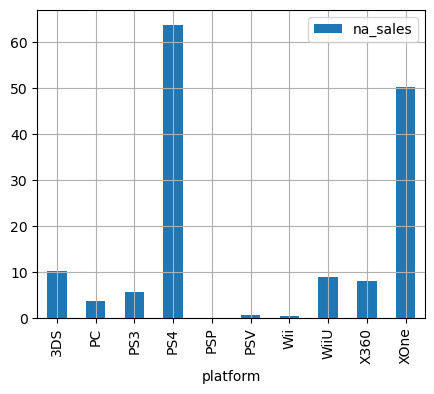

In [122]:
#graficando las ventas de las distintas plataformas en NA
platform_na.plot(x="platform", y="na_sales", grid=True, figsize=(5,4), kind="bar")

In [123]:
#imprimiento los géneros con más ventas desde el 2015
genre_na = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["genre"], values="na_sales", aggfunc="sum")
          .reset_index()
         )
genre_na.sort_values(by="na_sales", ascending=False).head()

,genre,na_sales
8,Shooter,48.18
0,Action,33.68
10,Sports,26.31
7,Role-Playing,19.82
3,Misc,5.58


<AxesSubplot:xlabel='genre'>

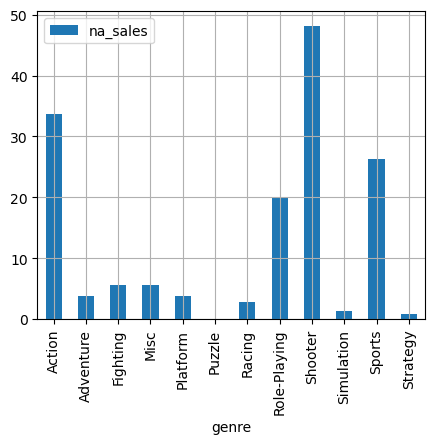

In [124]:
#graficando las ventas de los distintos géneros en NA
genre_na.plot(x="genre", y="na_sales", grid=True, figsize=(5,4), kind="bar")

In [125]:
#imprimiento los ratings con ventas desde el 2015
rating_na = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["rating"], values="na_sales", aggfunc="sum")
          .reset_index()
         )
rating_na.sort_values(by="na_sales", ascending=False)

,rating,na_sales
2,M,47.03
0,E,26.59
3,T,22.86
1,E10+,17.87


<AxesSubplot:xlabel='rating'>

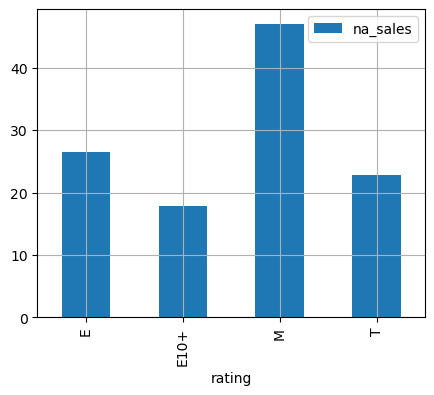

In [126]:
#graficando las ventas de los distintos ratings en NA
rating_na.plot(x="rating", y="na_sales", grid=True, figsize=(5,4), kind="bar")

**EU**

In [127]:
#imprimiento las plataformas con ventas desde el 2015
platform_eu = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["platform"], values="eu_sales", aggfunc="sum")
          .reset_index()
         )
platform_eu.sort_values(by="eu_sales", ascending=False).head()

,platform,eu_sales
3,PS4,83.54
9,XOne,28.10
1,PC,9.10
0,3DS,7.39
2,PS3,7.30


<AxesSubplot:xlabel='platform'>

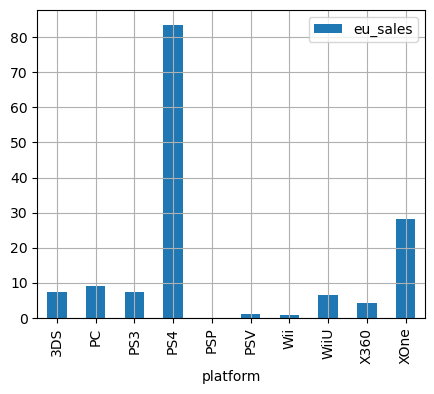

In [128]:
#graficando las ventas de las distintas plataformas en EU
platform_eu.plot(x="platform", y="eu_sales", grid=True, figsize=(5,4), kind="bar")

In [129]:
#imprimiento los géneros con más ventas desde el 2015
genre_eu = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["genre"], values="eu_sales", aggfunc="sum")
          .reset_index()
         )
genre_eu.sort_values(by="eu_sales", ascending=False).head()

,genre,eu_sales
8,Shooter,40.28
0,Action,34.82
10,Sports,27.82
7,Role-Playing,17.21
6,Racing,6.52


<AxesSubplot:xlabel='genre'>

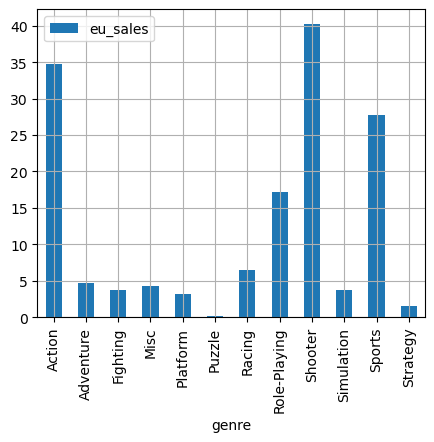

In [130]:
#graficando las ventas de los distintos géneros en EU
genre_eu.plot(x="genre", y="eu_sales", grid=True, figsize=(5,4), kind="bar")

In [131]:
#imprimiento los ratings con ventas desde el 2015
rating_eu = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["rating"], values="eu_sales", aggfunc="sum")
          .reset_index()
         )
rating_eu.sort_values(by="eu_sales", ascending=False)

,rating,eu_sales
2,M,45.54
0,E,34.83
3,T,20.32
1,E10+,11.54


<AxesSubplot:xlabel='rating'>

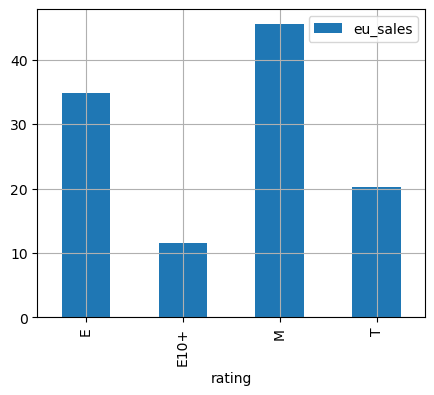

In [132]:
#graficando las ventas de los distintos ratings en EU
rating_eu.plot(x="rating", y="eu_sales", grid=True, figsize=(5,4), kind="bar")

**JP**

In [133]:
#imprimiento las plataformas con ventas desde el 2015
platform_jp = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["platform"], values="jp_sales", aggfunc="sum")
          .reset_index()
         )
platform_jp.sort_values(by="jp_sales", ascending=False).head()

,platform,jp_sales
0,3DS,23.55
3,PS4,12.05
5,PSV,8.41
2,PS3,4.97
7,WiiU,4.12


<AxesSubplot:xlabel='platform'>

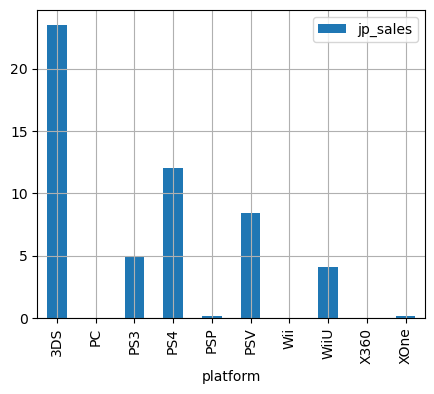

In [134]:
#graficando las ventas de las distintas plataformas en JP
platform_jp.plot(x="platform", y="jp_sales", grid=True, figsize=(5,4), kind="bar")

In [135]:
#imprimiento los géneros con más ventas desde el 2015
genre_jp = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["genre"], values="jp_sales", aggfunc="sum")
          .reset_index()
         )
genre_jp.sort_values(by="jp_sales", ascending=False).head()

,genre,jp_sales
0,Action,23.05
7,Role-Playing,13.41
8,Shooter,3.79
3,Misc,3.19
1,Adventure,2.22


<AxesSubplot:xlabel='genre'>

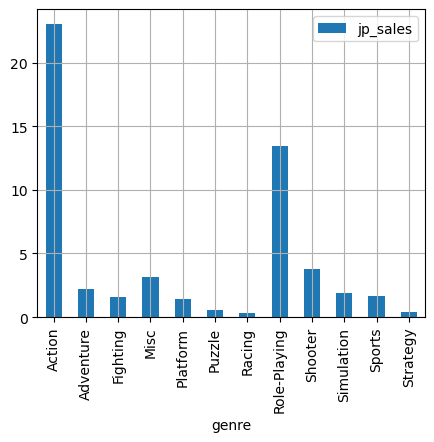

In [136]:
#graficando las ventas de los distintos géneros en JP
genre_jp.plot(x="genre", y="jp_sales", grid=True, figsize=(5,4), kind="bar")

In [137]:
#imprimiento los ratings con ventas desde el 2015
rating_jp = (df
          .query('(year_of_release >= 2015)')
          .pivot_table(index=["rating"], values="jp_sales", aggfunc="sum")
          .reset_index()
         )
rating_jp.sort_values(by="jp_sales", ascending=False)

,rating,jp_sales
3,T,7.70
0,E,5.25
2,M,4.29
1,E10+,3.27


<AxesSubplot:xlabel='rating'>

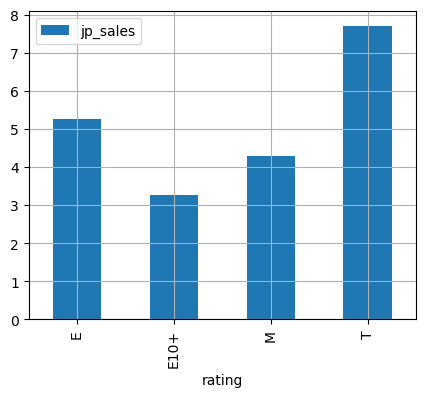

In [138]:
#graficando las ventas de los distintos ratings en JP
rating_jp.plot(x="rating", y="jp_sales", grid=True, figsize=(5,4), kind="bar")

Conclusiones:
- Donde menos se vende es en JP.
- Action es la categoría favorita.
- Los top de categorías son similares, excepto que NA y EU prefieren sport, y JP prefiere Misc.
- Claramente la categoría de los juegos influye en la popularidad. De hecho los juegos con rating E, T, M y E10+ son los más populares, los otros ya no se venden desde el 2015.

# Prueba de hipótesis <a id='hypothesis_test'></a>

In [139]:
df_clean = df.dropna(subset = ["user_score"]).reset_index(drop = True)

**Primera hipótesis** <a id='first_hypothesis'></a>

H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas

In [140]:
def t_density(
    x: List[float],
    df: int=1,
) -> List[float]:
    
    t_pdfs = []
    
    for x_eval in x:
        pdf = t.pdf(x_eval, df)
        
        t_pdfs.append(pdf)
    
    return t_pdfs

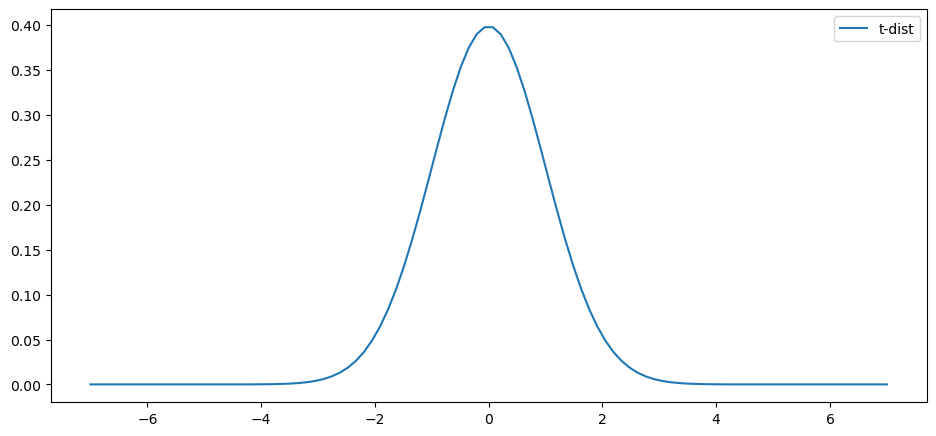

In [141]:
x_score = np.linspace(-7,7,100)

#calculando los grados de libertad
n = len(df_clean.loc[df_clean["platform"] == "XOne", "user_score"])
m = len(df_clean.loc[df_clean["platform"] == "PC", "user_score"])
df_est = n + m - 2

#graficando el estadístico t
pdf_score = t_density(x_score, df_est)

fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(x=x_score, y=pdf_score, ax=ax, label="t-dist")

fig.tight_layout(pad=3.0)

In [142]:
#calculando el estadístico de la hipótesis y p_value
t_stat, p_value = ttest_ind(
    df_clean.loc[df_clean["platform"] == "XOne", "user_score"],
    df_clean.loc[df_clean["platform"] == "PC", "user_score"]
)

print(t_stat, p_value)

-4.368333815003015 1.3896435533548819e-05


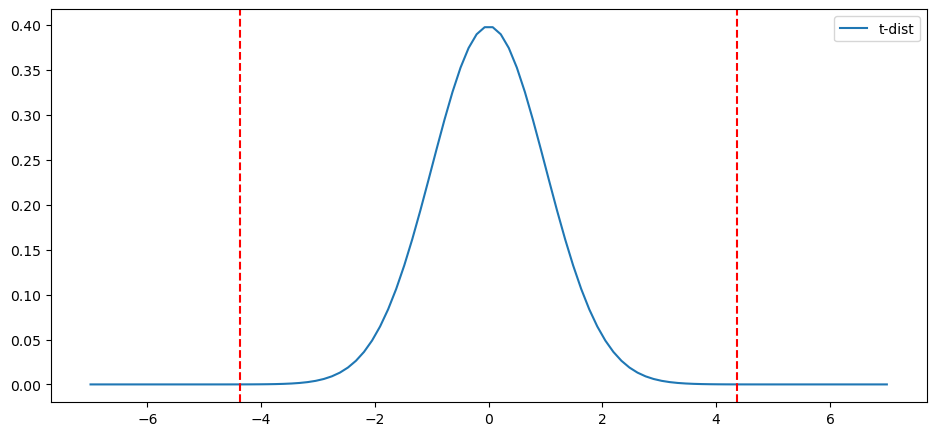

In [143]:
#graficando donde está el estadístico
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=x_score, y=pdf_score, ax=ax, label="t-dist")
ax.axvline(x=t_stat, color="red", ls="--")
ax.axvline(x=-t_stat, color="red", ls="--")
fig.tight_layout(pad=3.0)

Con un nivel de significancia de 0.01, al observar que p_value es mayor que el nivel de significancia, no existe suficiente evidencia para rechazar la hipótesis nula, es decir que podría ser que "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas". 

**Segunda hipótesis** <a id='second_hypothesis'></a>

H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales

H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

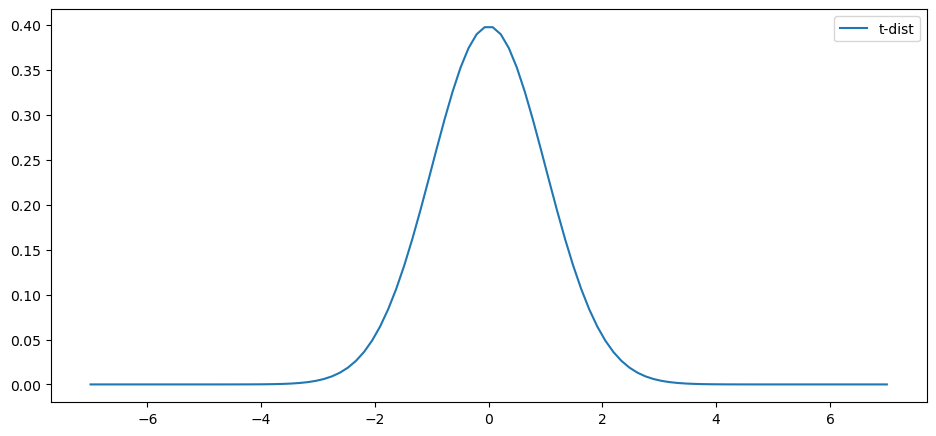

In [144]:
x_score = np.linspace(-7,7,100)

#calculando los grados de libertad
n = len(df_clean.loc[df_clean["genre"] == "Action", "user_score"])
m = len(df_clean.loc[df_clean["genre"] == "Sports", "user_score"])
df_est = n + m - 2

#graficando el estadístico t
pdf_score = t_density(x_score, df_est)

fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(x=x_score, y=pdf_score, ax=ax, label="t-dist")

fig.tight_layout(pad=3.0)

In [145]:
#calculando el estadístico de la hipótesis y p_value
t_stat, p_value = ttest_ind(
    df_clean.loc[df_clean["genre"] == "Action", "user_score"],
    df_clean.loc[df_clean["genre"] == "Sports", "user_score"]
)

print(t_stat, p_value)

1.6259419280500857 0.10406951359049141


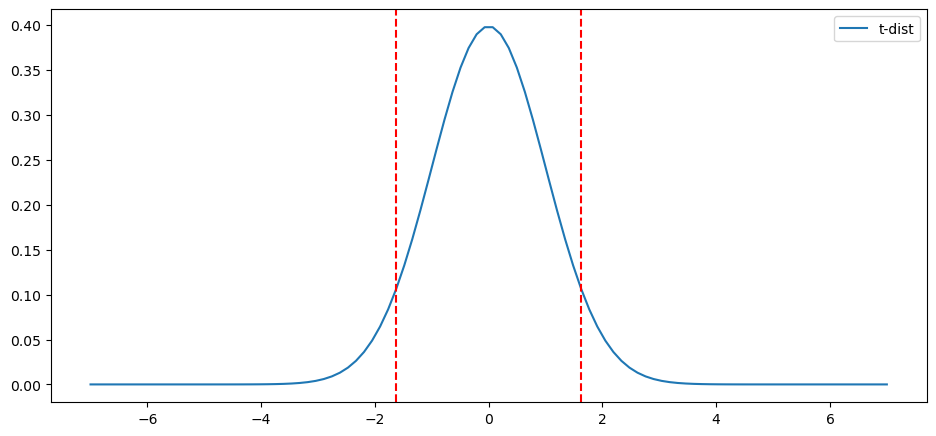

In [146]:
#graficando donde está el estadístico
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=x_score, y=pdf_score, ax=ax, label="t-dist")
ax.axvline(x=t_stat, color="red", ls="--")
ax.axvline(x=-t_stat, color="red", ls="--")
fig.tight_layout(pad=3.0)

Con un nivel de significancia de 0.05, al observar que p_value es mayor que el nivel de significancia, no existe suficiente evidencia para rechazar la hipótesis nula, es decir que podría ser que "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales". 

# Conclusion <a id='end'></a>

Se trabajó la data base inicial para cambiar los tipos de datos necesarios, eliminar o rellenar datos ausentes, finalmente se decidió no rellenar por completo los datos faltantes ya que no había forma de rellenarlos de forma fidedigna.

Posteriormente se realizaron algunos análisis de datos para comprender de que dependía el éxito de las ventas.

Se hizo un perfil de usuario para entender como variaban las ventas según area y se concluyó lo siguiente:
- Donde menos se vende es en JP.
- Action es la categoría favorita.
- Los top de categorías son similares, excepto que NA y EU prefieren sport, y JP prefiere Misc.
- Claramente la categoría de los juegos influye en la popularidad. De hecho los juegos con rating E, T, M y E10+ son los más populares, los otros ya no se venden desde el 2015.

Finalmente se realizaron 2 test de hipótesis y se concluyó lo siguiente:
- Con un nivel de significancia de 0.01, al observar que p_value es mayor que el nivel de significancia, no existe suficiente evidencia para rechazar la hipótesis nula, es decir que podría ser que "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas". 
- Con un nivel de significancia de 0.05, al observar que p_value es mayor que el nivel de significancia, no existe suficiente evidencia para rechazar la hipótesis nula, es decir que podría ser que "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales". 

En general, se puede concluir que:
- Los ciclos de las consolas son 10 años aprox.
- Las críticas no influyen lo suficiente en el éxito de ventas del juego
- El rating de los juegos afecta en las ventas
- El éxito de la consola depende de la región